In [1]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://archive.ics.uci.edu/static/public/9/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [2]:
# 删除指定的列
df.drop(columns=['car_name'], inplace=True)
# 计算相关系数矩阵
df.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450,1.000000


In [3]:
# 删除有缺失值的样本
df.dropna(inplace=True)
# 将origin字段处理为类别类型
df['origin'] = df['origin'].astype('category') 
# 将origin字段处理为独热编码
df = pd.get_dummies(df, columns=['origin'], drop_first=True)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,18.0,False,False
1,8,350.0,165.0,3693,11.5,70,15.0,False,False
2,8,318.0,150.0,3436,11.0,70,18.0,False,False
3,8,304.0,150.0,3433,12.0,70,16.0,False,False
4,8,302.0,140.0,3449,10.5,70,17.0,False,False
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,27.0,False,False
394,4,97.0,52.0,2130,24.6,82,44.0,True,False
395,4,135.0,84.0,2295,11.6,82,32.0,False,False
396,4,120.0,79.0,2625,18.6,82,28.0,False,False


In [4]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='mpg').values, df['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
print('回归系数:', model.coef_)
print('截距:', model.intercept_)

回归系数: [-0.70865621  0.03138774 -0.03034065 -0.0064137   0.06224274  0.82866534
  3.20888265  3.68252848]
截距: -21.685482718950947


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'均方误差: {mse:.4f}')
print(f'平均绝对误差: {mae:.4f}')
print(f'决定系数: {r2:.4f}')

均方误差: 12.9604
平均绝对误差: 2.8331
决定系数: 0.7874


In [11]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('回归系数:', model.coef_)
print('截距:', model.intercept_)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'均方误差: {mse:.4f}')
print(f'决定系数: {r2:.4f}')

回归系数: [-0.68868217  0.03023126 -0.0291811  -0.00642523  0.06312298  0.82583962
  3.04105754  3.49988826]
截距: -21.39040269767494
均方误差: 12.9604
决定系数: 0.7874


In [12]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('回归系数:', model.coef_)
print('截距:', model.intercept_)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'均方误差: {mse:.4f}')
print(f'决定系数: {r2:.4f}')

回归系数: [-0.00000000e+00  4.46821248e-04 -1.22830326e-02 -6.29725191e-03
  0.00000000e+00  6.91590631e-01  0.00000000e+00  0.00000000e+00]
截距: -9.109888229244998
均方误差: 11.1035
决定系数: 0.8179


In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# 对特征进行选择和标准化处理
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X[:, [1, 2, 3, 5]])
# 重新拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, train_size=0.8, random_state=3)

# 模型的创建、训练和预测
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('回归系数:', model.coef_)
print('截距:', model.intercept_)

# 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'均方误差: {mse:.4f}')
print(f'决定系数: {r2:.4f}')

回归系数: [-0.26563689 -0.42821896 -4.97349187  2.84041103]
截距: [23.49759615]
均方误差: 11.4098
决定系数: 0.8129


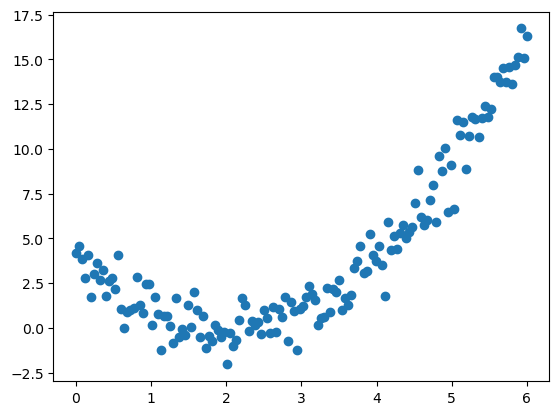

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6, 150)
y = x ** 2 - 4 * x + 3 + np.random.normal(1, 1, 150)
plt.scatter(x, y)
plt.show()

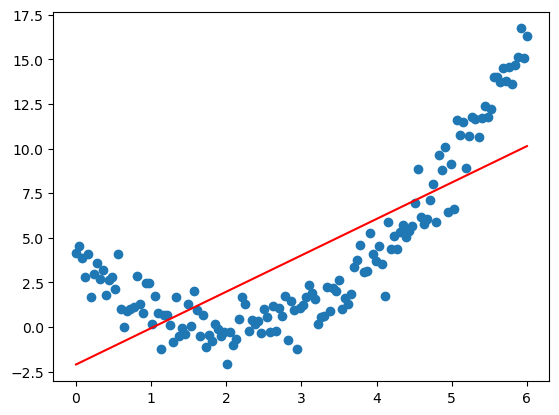

In [15]:
x_ = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x_, y)
a, b = model.coef_[0], model.intercept_
y_pred = a * x + b
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

In [16]:
r2 = r2_score(y, y_pred)

print(f'决定系数: {r2:.4f}')

决定系数: 0.5875


In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x_)

model = LinearRegression()
model.fit(x_, y)
y_pred = model.predict(x_)
r2 = r2_score(y, y_pred)
print(f'决定系数: {r2:.4f}')

决定系数: 0.9572


In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 生成1000条样本数据，每个样本包含6个特征
X, y = make_classification(n_samples=1000, n_features=6, random_state=3)
# 将1000条样本数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

# 创建和训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 对测试集进行预测并评估
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       104
           1       0.93      0.95      0.94        96

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

